In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 106s 1us/step


In [3]:
print('Traning data shape:', X_train.shape)
print('Testing data shape:', X_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [4]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

In [8]:
import numpy as np

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


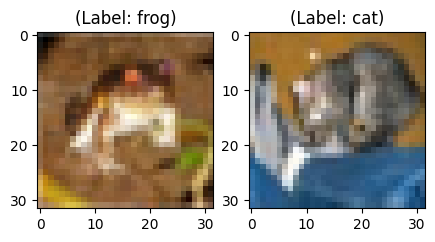

In [10]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(X_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(X_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

In [12]:
np.min(X_train), np.max(X_train)

(0, 255)

In [13]:
X_train = X_train / 255.0

In [14]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [15]:
X_train.shape

(50000, 32, 32, 3)

In [16]:
x_train_flat = X_train.reshape(-1,3072)

In [17]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

In [19]:
import pandas as pd

In [20]:
df_cifar = pd.DataFrame(x_train_flat, columns=feat_cols)

In [21]:
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [23]:
from sklearn.decomposition import PCA

In [24]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [25]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

In [26]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [27]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144]


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

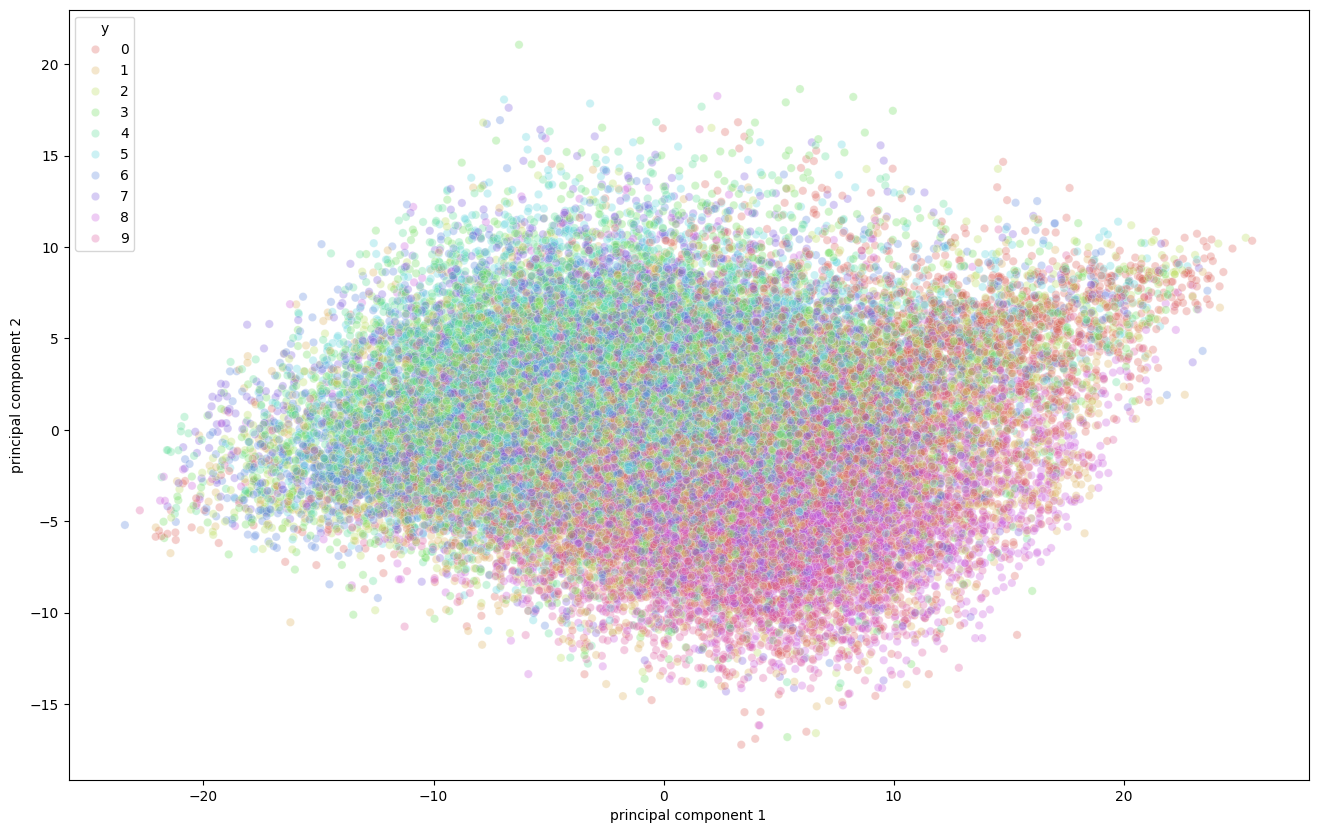

In [28]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)